# BPhO Computational Challenge 2025

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.ticker import FuncFormatter

from matplotlib.collections import LineCollection
import matplotlib.colors as colors

In [2]:
c = 3e8  # Speed of light in ms^-1

## Task 1a

$$n = \sqrt{1+\sum_k \frac{a_k \lambda^2}{\lambda^2-b_k}}$$

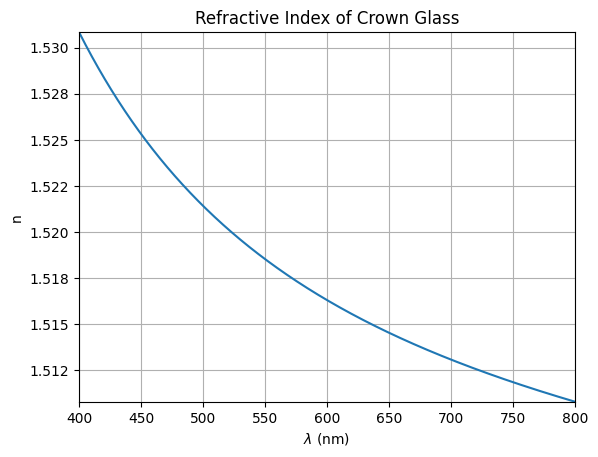

In [3]:
# Sellmeier coefficients
a = [1.03961212, 0.231792344, 1.01146945];
b = [0.00600069867, 0.0200179144, 103.560653];

lambdas = np.linspace(400, 800, 1000)  # Wavelengths in nm
x = lambdas / 1000  # Convert to μm

y = 0
for k in range(0,3):
    y += (a[k] * x**2) / (x**2 - b[k])
    
n = np.sqrt(1+y) # Refractive index

plt.plot(lambdas, n)
plt.title('Refractive Index of Crown Glass')
plt.xlabel(r'$\lambda$ (nm)')
plt.ylabel('n')
plt.xlim(400, 800)
plt.ylim(min(n), max(n))

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.3f}'))  # Round y-axis values to 3 decimal places
plt.grid(True)

plt.show()

## Task 1b

$$\left(n^2-1\right)^{-2} = 1.731 - 0.261 \left(\frac{f}{10^{15} \, \text{Hz}}\right)^2$$

In [4]:
def colours_from_f(f):
    """
    Converts frequencies to RGB values and color name with smooth interpolation
    Returns: (R, G, B, colour_str)
    """
    # Define frequency boundaries and colors
    freq_points = [405, 480, 510, 530, 600, 620, 680, 790]
    colors = [
        (1, 0, 0),      # Red
        (1, 0, 0),      # Red
        (1, 127/255, 0),  # Orange
        (1, 1, 0),      # Yellow
        (0, 1, 0),      # Green
        (0, 1, 1),      # Cyan
        (0, 0, 1),      # Blue
        (127/255, 0, 1) # Violet
    ]
    color_names = ['Red', 'Red', 'Orange', 'Yellow', 'Green', 'Cyan', 'Blue', 'Violet']
    
    if f < 405:
        return np.nan, np.nan, np.nan, 'Infra Red'
    elif f > 790:
        return np.nan, np.nan, np.nan, 'Ultra Violet'
    
    # Find the interpolation range
    for i in range(len(freq_points) - 1):
        if freq_points[i] <= f <= freq_points[i + 1]:
            # Linear interpolation
            t = (f - freq_points[i]) / (freq_points[i + 1] - freq_points[i])
            R = colors[i][0] * (1 - t) + colors[i + 1][0] * t
            G = colors[i][1] * (1 - t) + colors[i + 1][1] * t
            B = colors[i][2] * (1 - t) + colors[i + 1][2] * t
            
            # Choose color name based on which is closer
            colour_str = color_names[i] if t < 0.5 else color_names[i + 1]
            
            return R, G, B, colour_str
    
    # Only if no range found
    return 1, 1, 1, 'White'

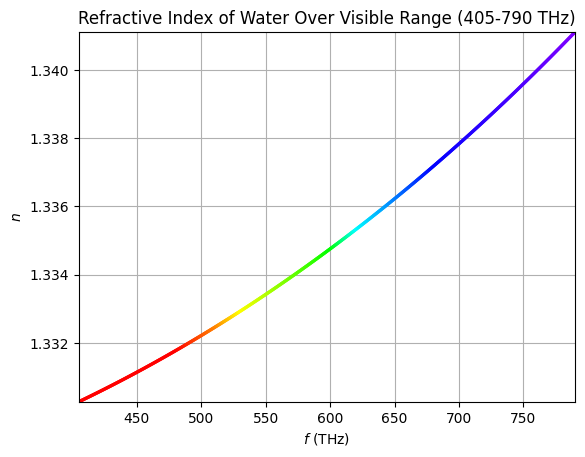

In [5]:
f12 = np.linspace(405, 790, 1000)  # frequency in THz
f = f12 * 1e12  # Convert to Hz

wavelengths_nm = (c / f) * 1e9  # wavelength in nm

lhs = 1.731 - 0.261 * (f / 1e15)**2
n = np.sqrt(1 + lhs**(-0.5))

# Assigns each frequency a colour
colors_list = []
for freq in f12:
    R, G, B, _ = colours_from_f(freq)
    colors_list.append((R, G, B))

# Scatter plot with many points to imitate a line
plt.scatter(f12, n, c=colors_list, s=2, alpha=0.8, zorder=2)

plt.xlim(min(f12), max(f12))
plt.ylim(min(n), max(n))
plt.title('Refractive Index of Water Over Visible Range (405-790 THz)')
plt.xlabel(r'$f$ (THz)')
plt.ylabel('$n$')
plt.grid(True, zorder=1)

plt.show()

## Task 2

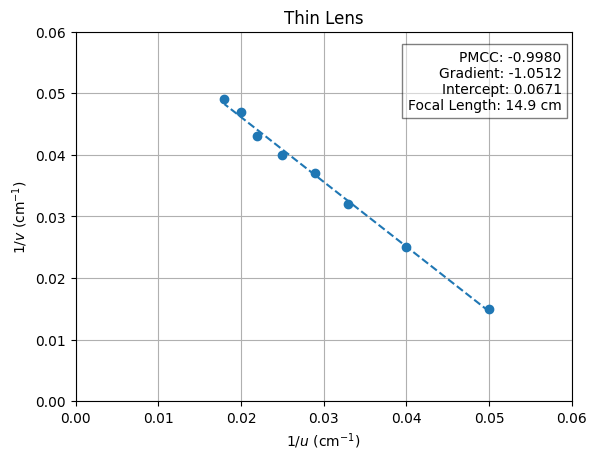

In [6]:
u = np.array([20, 25, 30, 35, 40, 45, 50, 55])
v = np.array([65.5, 40, 31, 27, 25, 23.1, 21.5, 20.5])
inv_u = np.array([0.05, 0.04, 0.033, 0.029, 0.025, 0.022, 0.02, 0.018])
inv_v = np.array([0.015, 0.025, 0.032, 0.037, 0.04, 0.043, 0.047, 0.049])

# Plot inv_v vs inv_u with line of best fit
plt.scatter(inv_u, inv_v, label='Data Points', zorder=2)
m, b = np.polyfit(inv_u, inv_v, 1)
plt.plot(inv_u, m * inv_u + b, label='Line of Best Fit', linestyle='--', zorder=3)
plt.title('Thin Lens')
plt.xlabel(r'$1/u$ (cm$^{-1}$)')
plt.ylabel(r'$1/v$ (cm$^{-1}$)')
plt.xlim(0,0.06)
plt.ylim(0,0.06)

plt.text(0.98, 0.95, f'PMCC: {np.corrcoef(inv_u, inv_v)[0,1]:.4f}\nGradient: {m:.4f}\nIntercept: {b:.4f}\nFocal Length: {1/b:.1f} cm', 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))


plt.grid(True, zorder=1)

plt.show()

The line of best fit approximates the line given by the thin lens equation:
$$\frac{1}{v} = \frac{1}{f} - \frac{1}{u}$$
The calculated PMCC is $-0.9980 \approx -1$, implying an exact linear relationship between $1/v$ and $1/u$. The gradient is $-1.0512 \approx -1$, which is to be expected. The focal point, $f$, is given by the reciprocal of the $y$-intercept.

$$
f = \frac{1}{0.06714} = 14.9 \, \text{cm}
$$

## Task 3

$$
\begin{align*}
x &= y \tan\theta \\
L - x &= y \tan\phi
\end{align*}
$$

$$t = \frac{\sqrt{x^2 + y^2}}{c/n} + \frac{\sqrt{(L - x)^2 + y^2}}{c/n}$$

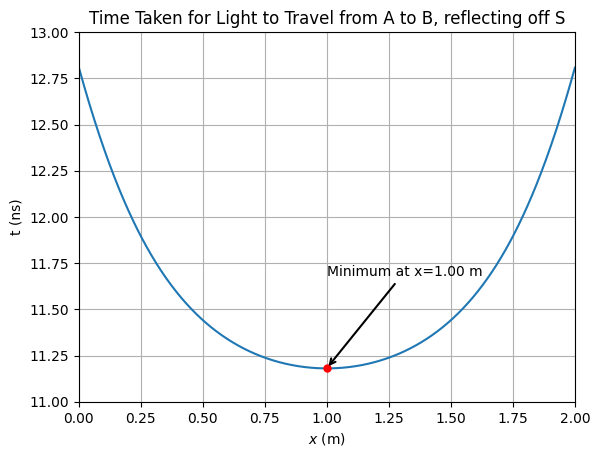

In [7]:
L = 2 # Length of AB in m
x = np.linspace(0, L, 1000)  # Horizontal distance from A to S in m
y = 0.5  # Vertical distance from A to S in m

n = 1.5  # Refractive index of the medium

t = np.sqrt(x**2 + y**2) / (c/n) + np.sqrt((L - x)**2 + y**2) / (c/n)
t9 = t * 1e9 # Convert time to ns

plt.plot(x, t9)
plt.title('Time Taken for Light to Travel from A to B, reflecting off S')
plt.xlabel('$x$ (m)')
plt.ylabel('t (ns)')
plt.xlim(0, L)
plt.ylim(11.0, 13.0)
plt.grid(True)

min_index = np.argmin(t9) # index of the minimum time
plt.plot(x[min_index], t9[min_index], 'ro', markersize=5, label='Minimum')  # Red circle marker
plt.annotate(f'Minimum at x={x[min_index]:.2f} m', 
             xy=(x[min_index], t9[min_index]), 
             xytext=(x[min_index], t9[min_index] + 0.5),
             arrowprops=dict(arrowstyle='->', lw=1.5))

plt.show()

By Fermat's principle, the time taken for light to travel from one point to another is minimized. Here, the minimum time is when $x = L/2$. This gives
$$
L/2 = y \tan\theta,
$$
and
$$
L - L/2 = L/2 = y \tan\phi.
$$
Therefore, $\theta = \phi$, meaning that Fermat's principle leads to the law of reflection.

## Task 4

$$
\begin{align*}
x &= y \tan\theta \\
L - x &= Y \tan\phi
\end{align*}
$$

$$t = \frac{\sqrt{x^2 + y^2}}{c/n_1} + \frac{\sqrt{(L - x)^2 + Y^2}}{c/n_2}$$

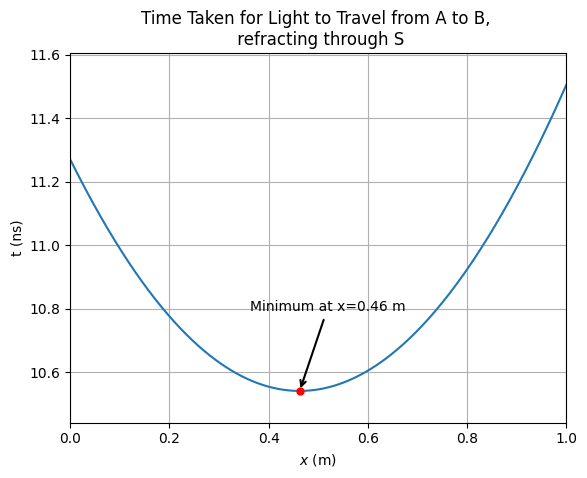

In [8]:
L = 1 # Length of AB in m
y = 1 # Vertical distance from A to S in m
Y = 1 # Vertical distance from S to B in m
x = np.linspace(0, L, 1000) # Horizontal distance from A to S in m

n_1 = 1.5  # Refractive index of first medium
n_2 = 1.33  # Refractive index of second medium

t = np.sqrt(x**2 + y**2) / (c/n_1) + np.sqrt((L - x)**2 + Y**2) / (c/n_2)

t9 = t * 1e9

plt.plot(x, t9)
plt.title('Time Taken for Light to Travel from A to B, \n refracting through S')
plt.xlabel('$x$ (m)')
plt.ylabel('t (ns)')
plt.xlim(0, L)
plt.ylim(min(t9)-0.1, max(t9)+0.1)
plt.grid(True)

min_index = np.argmin(t9) # index of the minimum time
plt.plot(x[min_index], t9[min_index], 'ro', markersize=5, label='Minimum')  # Red circle marker
plt.annotate(f'Minimum at x={x[min_index]:.2f} m', 
             xy=(x[min_index], t9[min_index]), 
             xytext=(x[min_index] - 0.1, t9[min_index] + 0.25),
             arrowprops=dict(arrowstyle='->', lw=1.5))

plt.show()

Our minimum value is what we would get from using Snell's law to solve for $x$, though that is much easier to do numerically than find a closed-form solution.

## Task 5

In [9]:
import plotly.graph_objects as go
from PIL import Image

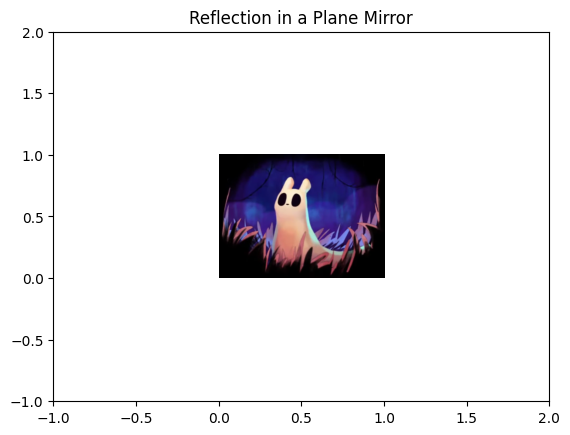

In [10]:
%matplotlib inline

# matplotlib plot with image - draggable
fig, ax = plt.subplots()
img = plt.imread('Figures/image.png')
im = ax.imshow(img, extent=[0, 1, 0, 1], aspect='auto')


ax.set_title('Reflection in a Plane Mirror')
ax.set_xlim(-1, 2)
ax.set_ylim(-1, 2)

plt.show()

In [25]:
%matplotlib ipympl

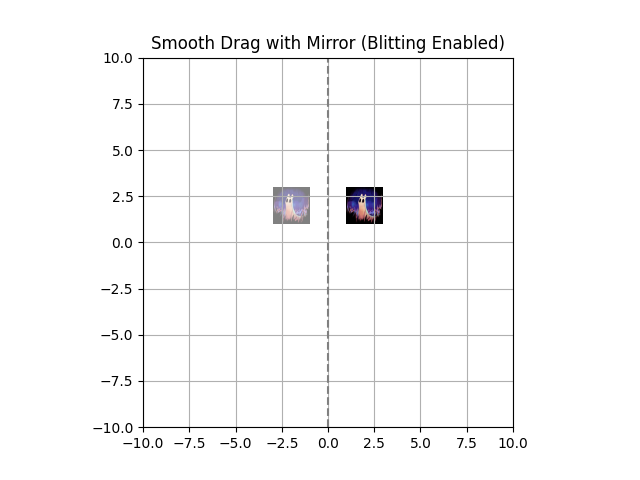

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Load your image
img = mpimg.imread('Figures/image.png')  # Replace with your image path

fig, ax = plt.subplots()
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

# Mirror configuration
mirror_type = 'vertical'
mirror_pos = 0

# Add mirror line
if mirror_type == 'vertical':
    mirror_line = ax.axvline(mirror_pos, color='gray', linestyle='--')
else:
    mirror_line = ax.axhline(mirror_pos, color='gray', linestyle='--')

# Initial image position
img_pos = [2, 2]  # x, y

# Display image and reflection
img_obj = ax.imshow(img, extent=[img_pos[0]-1, img_pos[0]+1, img_pos[1]-1, img_pos[1]+1])
ref_obj = ax.imshow(img, extent=[-img_pos[0]-1, -img_pos[0]+1, img_pos[1]-1, img_pos[1]+1], alpha=0.5)

dragging = False

def update_image_position(x, y):
    # Move main image
    img_obj.set_extent([x-1, x+1, y-1, y+1])
    
    # Reflect image
    if mirror_type == 'vertical':
        x_ref = 2 * mirror_pos - x
        ref_obj.set_extent([x_ref-1, x_ref+1, y-1, y+1])
    else:
        y_ref = 2 * mirror_pos - y
        ref_obj.set_extent([x-1, x+1, y_ref-1, y_ref+1])

    fig.canvas.draw_idle()

def on_press(event):
    global dragging
    if event.inaxes != ax: return
    ex, ey = event.xdata, event.ydata
    x0, y0 = img_pos
    # Check if click is inside the image area
    if x0-1 <= ex <= x0+1 and y0-1 <= ey <= y0+1:
        dragging = True

def on_release(event):
    global dragging
    dragging = False

def on_motion(event):
    if not dragging or event.inaxes != ax:
        return
    img_pos[0] = event.xdata
    img_pos[1] = event.ydata
    update_image_position(img_pos[0], img_pos[1])

fig.canvas.mpl_connect('button_press_event', on_press)
fig.canvas.mpl_connect('button_release_event', on_release)
fig.canvas.mpl_connect('motion_notify_event', on_motion)

plt.title("Drag the image – live mirror reflection")
plt.grid(True)
plt.show()